# ¡Hola, Ayrton!  

Mi nombre es Carlos Ortiz, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>
¡Empecemos!

# Pronostico de abandono para cadena de gimansios y segmentacion de clientes

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. La tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

Hay que:

 - Aprender a predecir la probabilidad de pérdida (para el próximo mes) para cada cliente.
 - Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales.
 - Analizar los factores que más impactan la pérdida.
 - Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente:
   - identificar a los grupos objetivo;
   - sugerir medidas para reducir la rotación;
   - describir cualquier otro patrón que observes con respecto a la interacción con los clientes.

## Preparacion

In [1]:
# Importamos todas las librerias a utilizar
from sklearn.metrics import precision_score, recall_score, accuracy_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



In [2]:
# Leemos los datos
gym = pd.read_csv('/datasets/gym_churn_us.csv')
gym.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con la importación de datos y de librerías.
</div>

## EDA

### Estadisticos y datos ausentes

In [3]:
# Mostramos los estadisticos del df
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [4]:
# Mostramos info
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

El df no parece tener caracteristicas ausentes. Proseguimos con el analisis sin realizar cambios.

### Diferencias entre clientes que se quedaron y clientes que abandonaron

In [5]:
gym.groupby(by='Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Entre las personas que se fueron y sequedaron observamos que:
 - se distribuyen equitativamente entre varones y mujeres
 - 87% de los que se quedaron viven/trabajan en el distrito vs 77% de los que se fueron
 - 53% de los que se quedaron trabajan en una empresa asociada vs 36% de los que se fueron
 - 35% de los que se quedaron fueron traidos por un amigo vs 18% de los que se fueron
 - tanto los que se fueron como los que se quedaron brindaron su celular (90%)
 - los que se quedaron tienen en promedio un contrato mas largo que los que se fueron
 - 46% de los que se quedaron participan en sesiones grupales vs 27% de los que se fueron
 - los que se quedan consumen en promedio 37% mas en servicios adicionales
 - los que se quedan tienen mas meses restantes para cumplir su contrato que los que se van
 - los que se quedan llevan en promedio 5 meses en el gimnasio, los que se van se suelen ir luego del primer mes en promedio
 - los que se quedan van al gimasio alrededor de 2 veces por semana vs las 1.5 veces en promedio de los que se van
 - los usuarios que se quedaron este mes van en promedio 2 vece por semana vs los que se fueron solo vinieron una vez por semana este mes
 
 

En resumen:
 - Los usuarios que se quedan:
     - viven mas cerca
     - trabajan en empresas asociadas
     - vinieron con un amigo
     - tomaron un contrato mas largo
     - participan en sesiones grupales
     - consumen servicios adicionales
     - tienen mas meses restantes de su membresia
     - van al gimnasio mas seguido

### Histogramas

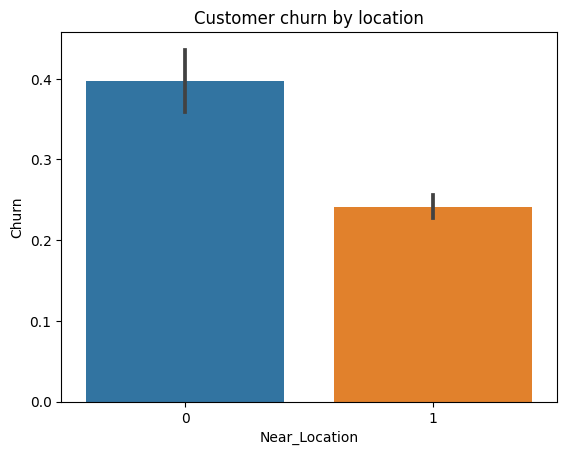

In [6]:
# Trazamos grafico de barras para la locacion
sns.barplot(data=gym, x='Near_Location', y='Churn')

plt.title('Customer churn by location')
plt.show()

Observamos que de las personas que viven lejos alrededor del 40% no sigue con el servicio. Por el contrario, menos del 30% de las personas que viven cerca desiste.

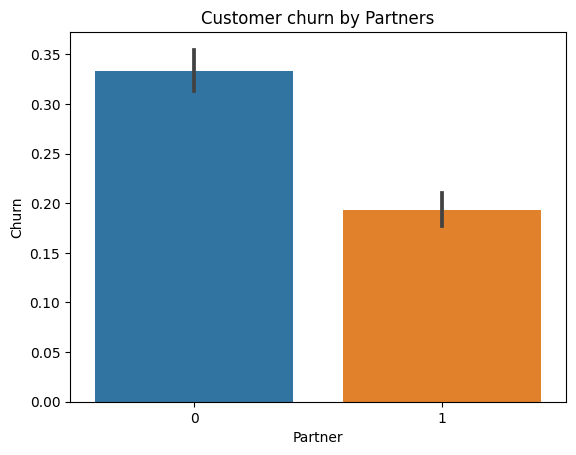

In [7]:
# Trazamos grafico de barras para asociados
sns.barplot(data=gym, x='Partner', y='Churn')

plt.title('Customer churn by Partners')
plt.show()

Vemos que solo el 20% de las personas que trabajan en una empresa asociada no sigue con el servicio. En comparacion, mas del 30% de las personas que no trabajan en una empresa asociada abandona el servicio.

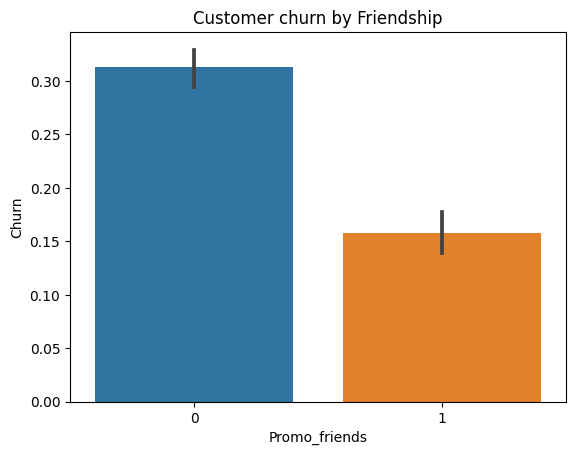

In [8]:
# Trazamos grafico de barras para invitaciones de amigos
sns.barplot(data=gym, x='Promo_friends', y='Churn')

plt.title('Customer churn by Friendship')
plt.show()

El grafico muestra que menos del 20% de las personas invitadas por sus amigos no sigue el servicio. En contraste, el 30% de las personas que llegan solas abandona el servicio.

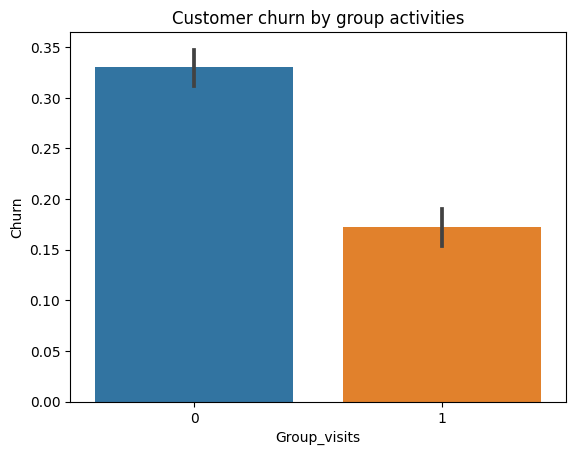

In [9]:
# Trazamos grafico de barras para actividades grupales
sns.barplot(data=gym, x='Group_visits', y='Churn')

plt.title('Customer churn by group activities')
plt.show()

Notamos que menos del 20% de las personas que participan en sesiones grupales deja el servicio. En cambio, mas del 30% de las personas que entrenan solas abandona el servicio.

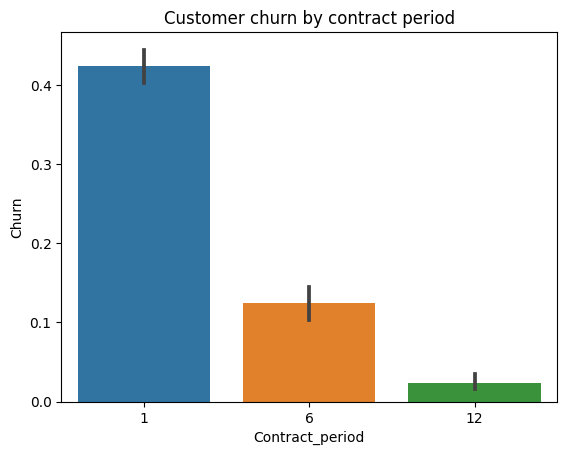

In [10]:
# Trazamos grafico de barras para contratos
sns.barplot(data=gym, x='Contract_period', y='Churn')

plt.title('Customer churn by contract period')
plt.show()

Del grafico podemos notar que mientras mayor es el compromiso inicial de la persona (perido de contrato inicial del servicio), menor es la tasa de desercion. 

<div class="alert alert-block alert-info">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Muchas gracias por su comentario. Fue extremadamente util y ya fue implementado. Lo tendre en mente para futuros proyectos.
</div>

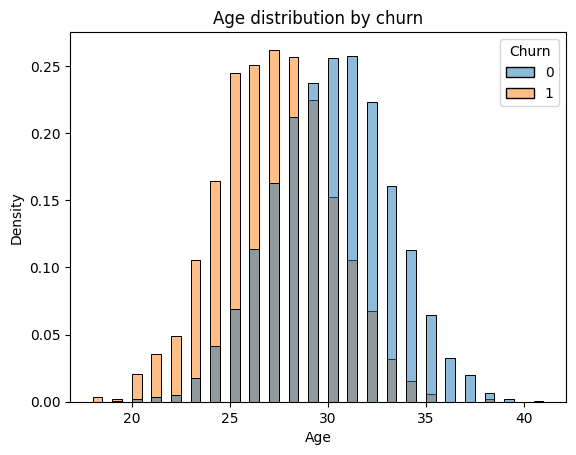

In [11]:
# Trazamos histogramas para edad
sns.histplot(data=gym,
             x='Age',
             hue='Churn',
             stat='density', 
             common_norm=False)
plt.title('Age distribution by churn')
plt.show()

Aparentemente, las personas que abandonan el servicio son en promedio 3 anhos menores que las personas que siguen con el servicio. Exisre bastante sobrelape en las distribuciones, esta hipotesis requiere ser validada con una prueba estadistica.

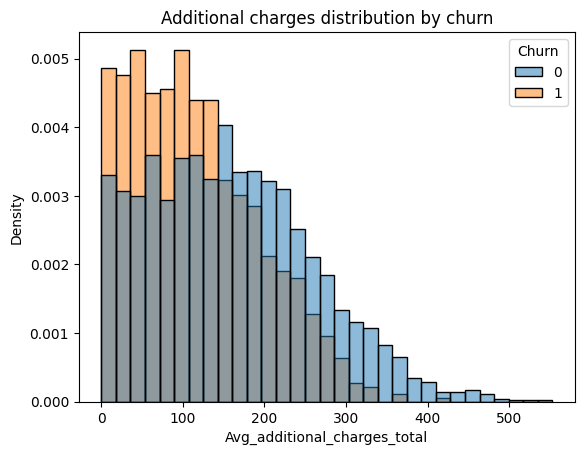

In [12]:
# Trazamos histogramas para los cargos por otros servicios
sns.histplot(data=gym,
             x='Avg_additional_charges_total',
             hue='Churn',
             stat='density', 
             common_norm=False)
plt.title('Additional charges distribution by churn')
plt.show()

Este grafico es interesante. Las personas que se fueron suelen tener una mayor proporcion de consumos menores a 150, mientras que las personas que se quedaron se distribuyen de forma mas uniforme entre los 0 y 200 de consumo. En promedio las peronas que se quedan consumen mas servcios adicionales producto de un grupo chico de personas con consumos mayores a 300.

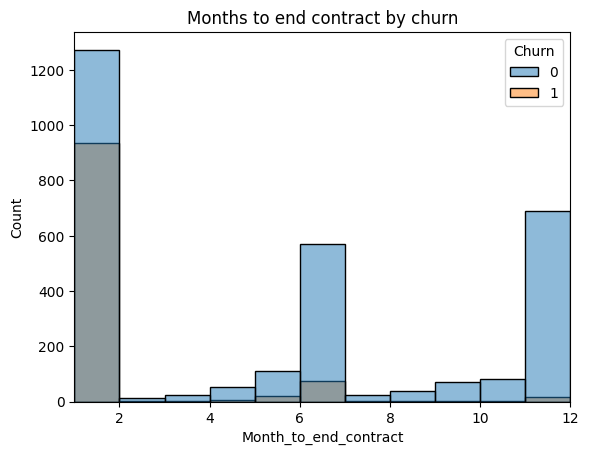

In [13]:
# Trazamos histogramas para los meses para el culmino del contrato
sns.histplot(data=gym,
             x='Month_to_end_contract',
             hue='Churn', 
             binwidth=1)
plt.xlim([1, 12])
plt.title('Months to end contract by churn')
plt.show()

Tanto para las personas que desertaron como las que se quedaron tienen en su mayoria un mes restante en el contrato, seguidos por 6 meses. Esto parece concordar nuevos ingresos que toman planes de 1 mes o 6 meses.

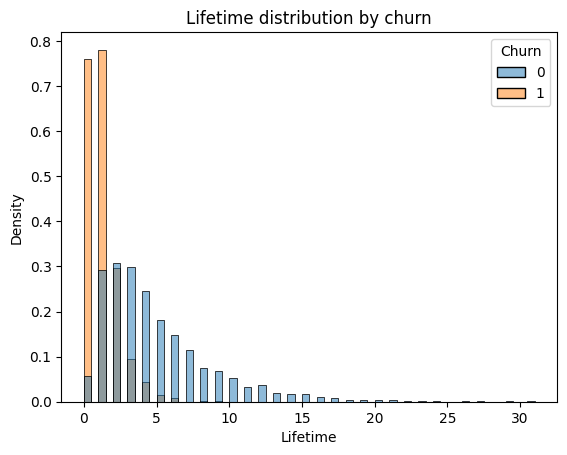

In [14]:
# Trazamos histogramas para los meses para el tiempo de vida
sns.histplot(data=gym,
             x='Lifetime',
             hue='Churn',
             stat='density', 
             common_norm=False)
plt.title('Lifetime distribution by churn')
plt.show()

Vemos que la mayor parte de las personas que abandonan lo hacen en los primeros dos meses. A su vez, la mayor parte de las personas que siguen usando el servicio son relativamente nuevas (menos de 6 meses).

Podemos considerar que no hay riesgo de que las personas que llevan mas de 6 meses abandones el servicio, estos clientes estan fidelizados.

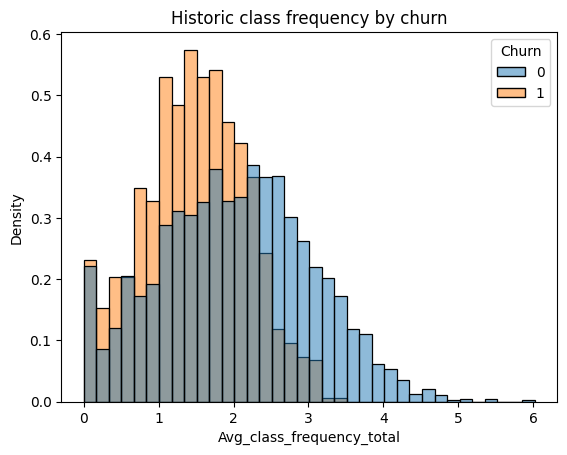

In [15]:
# Trazamos histogramas para los meses para la frecuencia media de visitas por semana (ciclo de vida)
sns.histplot(data=gym,
             x='Avg_class_frequency_total',
             hue='Churn',
             stat='density', 
             common_norm=False)
plt.title('Historic class frequency by churn')
plt.show()

Observamos que las personas que se quedansuelen ir mas seguido al gimasio a lo largo de su ciclo de vida, en promedio un dia mas a la semana.

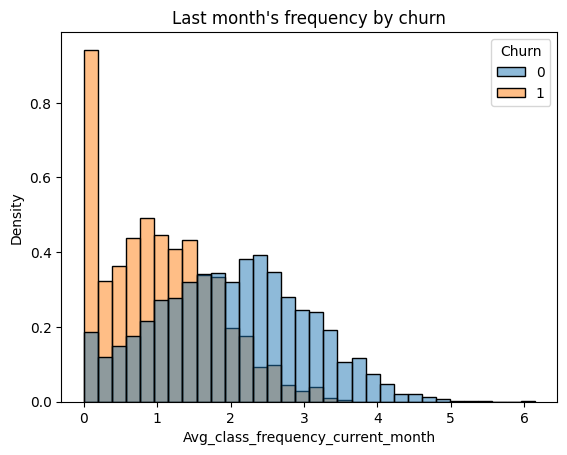

In [16]:
# Trazamos histogramas para los meses para la frecuencia media de visitas por semana (ultimo mes)
sns.histplot(data=gym,
             x='Avg_class_frequency_current_month',
             hue='Churn',
             stat='density', 
             common_norm=False)
plt.title("Last month's frequency by churn")
plt.show()

Las personas que desertaron este mes, solo fueron en promedio una vez a la semana. Las personas que se quedaron fueron entre 2 a 3 veces por semana.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con estos gráficos.
</div>

### Correlaciones

In [17]:
# Se calcula la matriz de correlacion
gym_corr = gym.corr()
gym_corr.shape

(14, 14)

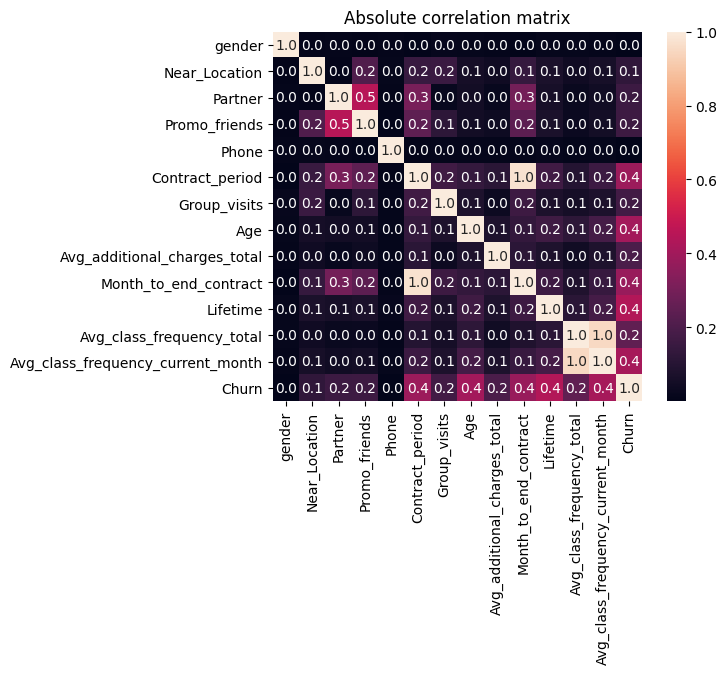

In [18]:
# Se muestra la matriz de correlacion como mapa de calor (valores absolutos para mejor rango dinamico)
sns.heatmap(abs(gym_corr),
           annot=True,
           square=True,
           fmt='.1f')
plt.title('Absolute correlation matrix')
plt.show()

La figura muestra la matriz de correlaciones absolutas. Mostramos el valor absoluto de las correlaciones debido a que en esta etapa nos interesa mas encontrar si existe una correlacion fuerte entre algunas de las caracteristicas, independiente de si esta es positiva o negativa.

Podemos observar que hay dos pares de caracteristicas con muy fuertes correlaciones entre si (cerca de 1):
 - frecuencia media de visitas en mes en curso vs frecuencia media de visitas a lo largo del ciclo de vida
 - periodo de contrato vs meses para que expire el contrato
 
Estas correlaciones tienen sentido debido a lo observado en los graficos anteriores: la gran cantidad de nuevos ingresos. Al existir gran parte de nuevos ingresos, los meses de contrato se correlaciones con los meses faltantes en el contrato (al ser el mismo valor). La gran cantidad de nuevos ingresos implica que no su comportamiento no varia mucho entre su ingreso y el mes actual.

Mostramos los graficos de dispersion para mostrar mejor lo expuesto.

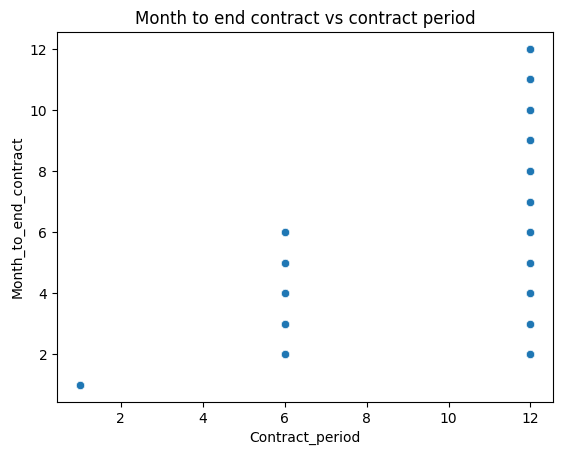

In [19]:
# Grafico de dispersion de meses de contrato vs meses restantes
sns.scatterplot(x=gym['Contract_period'], 
                y=gym['Month_to_end_contract'])
plt.title('Month to end contract vs contract period')
plt.show()

Podemos ver que a mayor cantidad de meses contratados inicialmente, existe una mayor cantidad de meses faltantes para que termine el contrato. Observamos una clara dispersion ocasionada por la naturaleza de los datos y los clientes con mayor tiempo en el servicio.

Lamentablemente este grafico no nos permite observar la cantidad de datos detras de cada punto, por lo que la tendencia es observable mas no obvia.

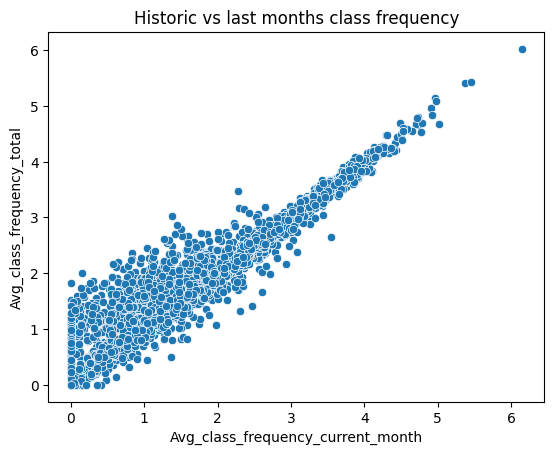

In [20]:
# Grafico de dispersion de frecuencia de visitas historica vs frecuencia de visitas en el ultimo mes
sns.scatterplot(x=gym['Avg_class_frequency_current_month'], 
                y=gym['Avg_class_frequency_total'])
plt.title('Historic vs last months class frequency')
plt.show()


Este grafico muestra una tendencia mucho mas clara: el comportamiendo historico de los clientes se relaciona con su comportamiento el ultimo mes. Los usuarios suelen tomar una rutina y mantenerse en ella, con variaciones cuando uno recien toma el ritmo (0 a 2 veces por semana).

Podemos concluir que el comportamiento de los clientes es estable durante el tiempo, lo cual es importante para nuestros algoritmos de ML.

### Conclusiones

 - El df no contiene caracteristicas ausentes y buena parte de estas son binarias
 - Las carencia de dinamicas sociales (pertenencia al barrio/grupo, convenios, amistades, etc) parecen influir en el abandono de los clientes
 - El compromiso inicial del cliente (contrato) es importante para su fidelidad (si ya pago, probablemente se obligue a venir para no desperdiciar su inversion)
 - Los clientes comprometidos (los que van frecuentemente) no suelen abandonar
 - Los mas jovenes parecen tener mayor tendencia al abandono (se debe verificar con prueba de hipotesis)
 - El tiempo de fidelizacion aproximado es de 6 meses (poco probable que abandonen luego)
 - Contamos con dos pares de caracteristicas correlacionadas, el dataset de caracteristicas debe ser reducido por lo menos en 2
 - El comportameinto de los clientes (frecuencia semanal de asistencia) es estable durante el tiempo

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Has hecho un muy buen trabajo con esta exploración gráfica de los datos. Ahora tenemos mayor claridad sobre lo que sucede al interior de nuestro dataset.
</div>

## Pronostico de Cancelacion

### Dividimos los datos

In [21]:
# Dividimos el dataset
X = gym.drop('Churn', axis=1)
y = gym['Churn']

In [22]:
# Dividimos los datos en set de entrenamiento y set de validacion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Entrenamos los modelos

In [23]:
# Escalamos los datos
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [24]:
# Entrenamos el modelo de regresion logistica
logistic = LogisticRegression(random_state=42)
logistic.fit(X_train_st, y_train)

LogisticRegression(random_state=42)

In [25]:
# Entrenamos el modelo de bosque aleatorio
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train_st, y_train)

RandomForestClassifier(random_state=42)

### Evaluamos

In [26]:
# Pronosticamos
y_pred_log = logistic.predict(X_test_st)
y_pred_for = forest.predict(X_test_st)

In [27]:
# Calculamos las metricas para regresion logistica
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)


In [28]:
# Calculamos las metricas para bosque aleatorio
accuracy_for = accuracy_score(y_test, y_pred_for)
precision_for = precision_score(y_test, y_pred_for)
recall_for = recall_score(y_test, y_pred_for)

In [29]:
# Comparamos las metricas
print('Exactitud - Regresion Logistica: ', accuracy_log)
print('Precision - Regresion Logistica: ', precision_log)
print('Recall - Regresion Logistica: ', recall_log)

print('Exactitud - Bosque Aleatorio: ', accuracy_for)
print('Precision - Bosque Aleatorio: ', precision_for)
print('Recall - Bosque Aleatorio: ', recall_for)

Exactitud - Regresion Logistica:  0.91625
Precision - Regresion Logistica:  0.8729281767955801
Recall - Regresion Logistica:  0.7821782178217822
Exactitud - Bosque Aleatorio:  0.91
Precision - Bosque Aleatorio:  0.8494623655913979
Recall - Bosque Aleatorio:  0.7821782178217822


Comparando ambos modelos, vemos que los resultados de las metricas son muy similares. La exactitud de ambos modelos es igual hasta el segundo decimal, la precision hasta el primero y el recall es identico (lo cual es curioso).

Si tomamos los numeros a secas, la Regresion logistica dio un resultado ligeramente superior: 92% vs 91% en Exactitud y 87% vs 85% en Precision.

Que ambos modelos tengan el mismo valor de recall nos indica una cosa: ambos modelos tienen la misma cantidad de falsos negativos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Bien. En un futuro podrás emplear optimización de hiperparámetros para mejorar las métricas del modelo.
</div>

### Conclusiones

- Ambos modelos presentan buenos resultados
- Las metricas difieren poco entre ambos modelos
- Regresion logistica es ligereamente superior
- Recall es la metrica mas importante (pronostico de Churn rate)
- Ambos modelos presetan misma cantidad de falsos negativos
- En cuanto a recall, ambos modelos son equivalentes
- Se puede escoger regresion por un tema de interpretabilidad de los parametros


## Segmentacion

### Estandarizacion

In [30]:
# Estandarizamos los datos
scaler = StandardScaler()
X_st = scaler.fit_transform(X)

### Dendograma

In [31]:
# Creamos una matriz de distancias
linked = linkage(X_st, method = 'ward')

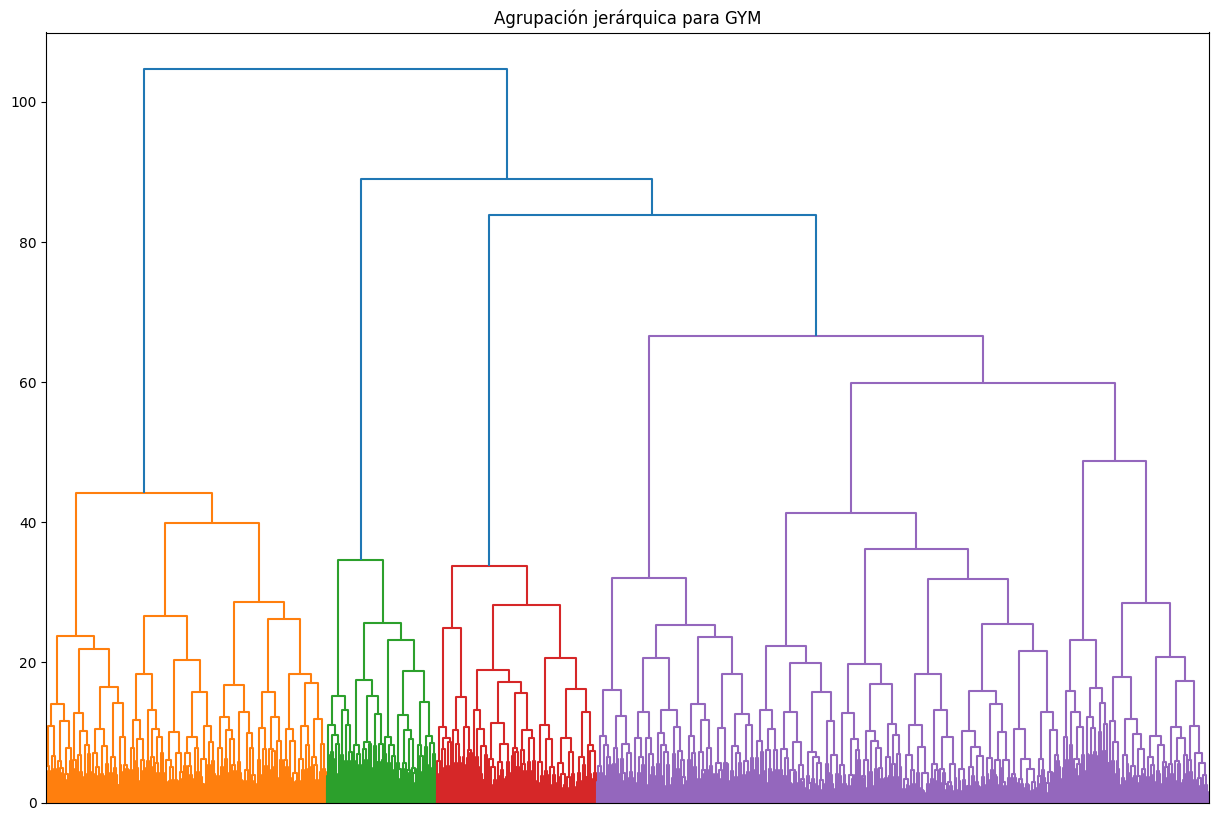

In [32]:
# Ploteamos el dendograma
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')

plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,        
    labelbottom=False)
plt.title('Agrupación jerárquica para GYM')
plt.show()

<div class="alert alert-block alert-info">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gracias por el comentario. Fue implementado.
</div>

Observamos que el numero optimo de clusteres es K=4.

### Clustering

In [33]:
# Aplicamos el algoritmo K-Means
km = KMeans(n_clusters = 5, random_state=42)
labels = km.fit_predict(X_st)

### Valores medios por cluster

In [34]:
# Almacenamos las etiquetas de clúster 
gym['cluster_km'] = labels

# Obtenemos los valores medios de las características por clúster
gym.groupby(by='cluster_km').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.502370,0.949447,0.829384,0.998420,1.0,3.097946,0.448657,29.104265,141.774331,2.887836,3.772512,1.770536,1.669581,0.246445
1,0.554556,0.849269,0.263217,0.052868,1.0,2.606299,0.436445,30.008999,159.774265,2.419573,4.780652,2.745505,2.733173,0.089989
2,0.499422,0.937572,0.737572,0.478613,1.0,11.854335,0.546821,29.905202,163.509804,10.812717,4.677457,2.006405,1.998179,0.021965
3,0.485738,0.718011,0.299919,0.018745,1.0,1.914425,0.276284,28.083945,129.496414,1.821516,2.195599,1.225192,0.967967,0.572942
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


- Todos los clusteres estan distribuidos de forma medianamente uniforme entre hombres y mujeres
- En el cluster 1 solo 1 de cada 4 personas trabajan en empresas asociadas, en el 0 casi todas
- En los clusters 1 y 3 muy pocas personas vinieron con amigos
- El cluster 2 contiene a las personas que tomaron contratos de 12 meses
- El cluster 2 participa en su mayoria en actividades grupales, el 3 es el que menos participa
- Los clusters 2 y 1 son los que consumen mas servicios adicionales
- En el cluster 2 estan las personas que mas tiempo les resta para terminar su contrato
- Los clusters 2 y 1 cuenta con las personas con mas tiempo en el gimnasio
- El cluster 1 cuenta con las personas que mas frecuentemente van al gimnasio (3 veces por semana)
- Los clusters 2 y 1 son los que tienen mayor retencion
- El clusters 3 es el que tienen mayor desercion

### Distribuciones

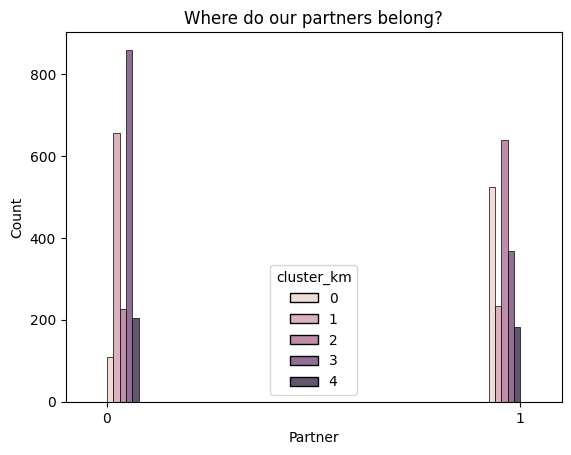

In [35]:
# Trazamos las distribuciones para convenios
sns.histplot(data=gym, x='Partner', hue='cluster_km', multiple='dodge')

plt.xlim([-0.1, 1.1])
plt.xticks(label=[0, 1], ticks=[0, 1])
plt.title('Where do our partners belong?')
plt.show()

Observamos que el cluster 2 cuanta con la mayor cantidad de personas que trabajan en empresas asociadas. El cluster por otro lado cuenta con la mayor cantidad de personas que no trabajan en empresas asociadas.

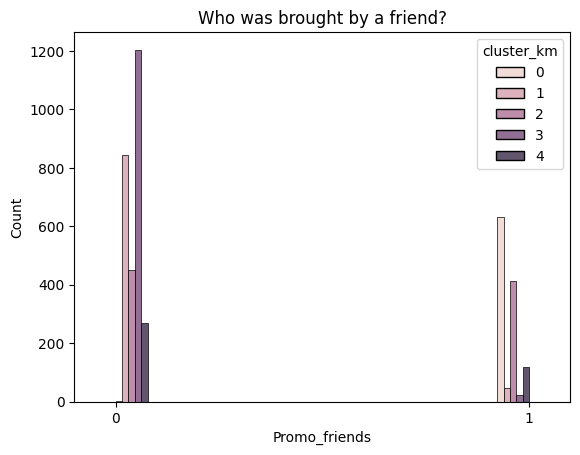

In [36]:
# Trazamos las distribuciones para amistades
sns.histplot(data=gym, x='Promo_friends', hue='cluster_km', multiple='dodge')

plt.xlim([-0.1, 1.1])
plt.xticks(label=[0, 1], ticks=[0, 1])
plt.title('Who was brought by a friend?')
plt.show()

De todas las personas que fueron solas, la mayoria se encuentra en el cluster 3. La mayor parte de personas que fueron con una amistad se encuentran en el cluster 0.

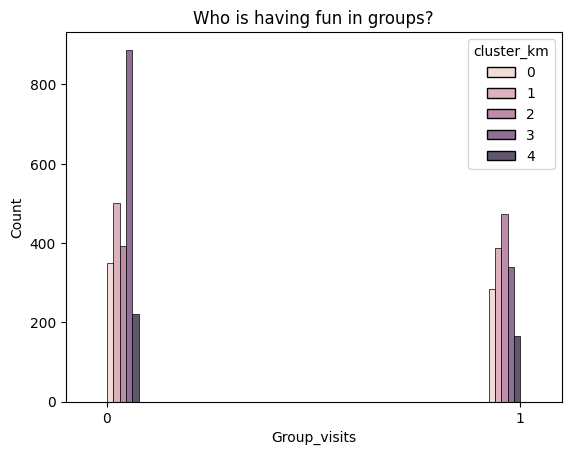

In [37]:
# Trazamos las distribuciones para actividades grupales
sns.histplot(data=gym, x='Group_visits', hue='cluster_km', multiple='dodge')

plt.xlim([-0.1, 1.1])
plt.xticks(label=[0, 1], ticks=[0, 1])
plt.title('Who is having fun in groups?')
plt.show()

De las personas que participan en actividades grupales, gran parte esta en el cluster 2. De las personas que prefieren entrenar solas, la mayoria est en el cluster 3.

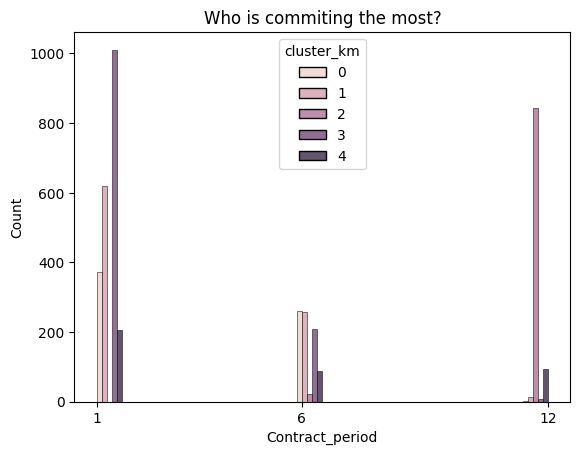

In [38]:
# Trazamos las distribuciones para periodo del contrato
sns.histplot(data=gym, x='Contract_period', hue='cluster_km', multiple='dodge')

plt.xticks(label=[1, 6, 12], ticks=[1, 6, 12])
plt.title('Who is commiting the most?')
plt.show()

La mayoria de personas toma contratos de un mes. De estas, gran parte estan en el cluster 3 y casi ninguna en el 2. De las personas que tomaron contrato de 12 meses, casi todas estan en el cluster 2.

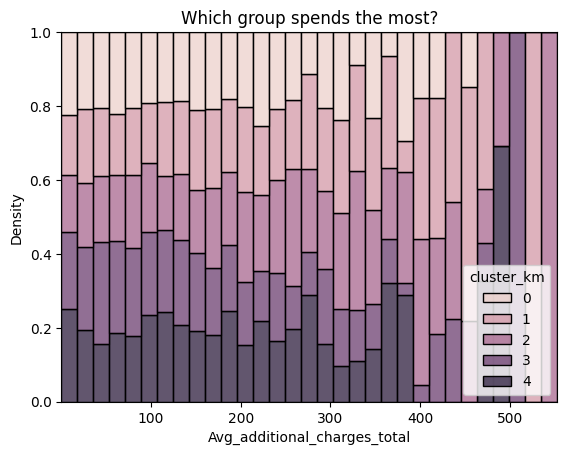

In [39]:
# Trazamos las distribuciones para consumos adicionales
sns.histplot(data=gym, x='Avg_additional_charges_total', hue='cluster_km', stat='density', common_norm=False, multiple='fill')

plt.title('Which group spends the most?')
plt.show()

Observamos que los clusters estan medianamente distribuidos en el ranfo de 0 a 200. Fuera de este, los datos atipocos de cada cluster toman mayor importancia, y la distribucion se hace erratica. Esto puede explicar las notorias diferencias en media para cada cluster en esta caracteristica.

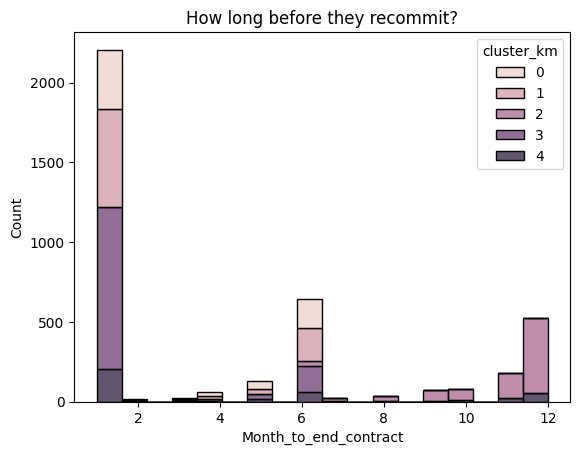

In [40]:
# Trazamos las distribuciones para meses a culmino de contrato
sns.histplot(data=gym, x='Month_to_end_contract', hue='cluster_km', multiple='stack')

plt.title('How long before they recommit?')
plt.show()

La mayoria de personas tiene 1 mes para que se termine su contrato, de las cuales gran parte pertenece al cluster 2. Las personas con 6 meses para que acabe su contrato se distribuyen de forma casi uniforme entre los clusteres 0, 1 y 3. Las personas que tienen 11 y 12 meses para que acabe su contrato perteneces principalmente al cluster 2.

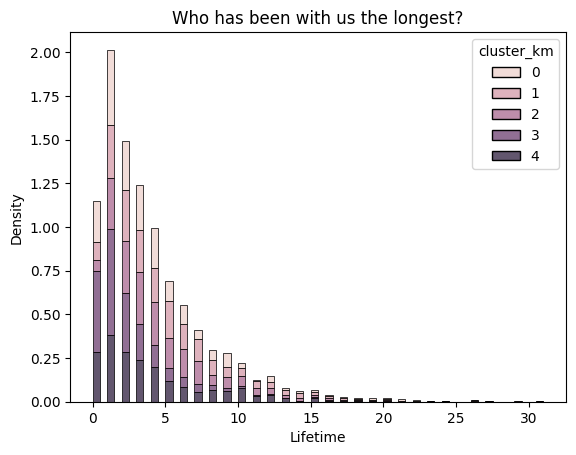

In [41]:
# Trazamos las distribuciones para ciclo de vida
sns.histplot(data=gym, x='Lifetime', hue='cluster_km', stat='density', common_norm=False, multiple='stack')

plt.title('Who has been with us the longest?')
plt.show()

Podemos apreciar nuevamente que los clusteres presentan distribuciones similares, las cuales crecen hasta un pico de 1-2 meses y luego decrecen. No existe una gran diferencia entre las medias de cada cluster, estas pueden verse principalmente afectadas por datos atipicos bastante grandes que no todos los clusters presentan.

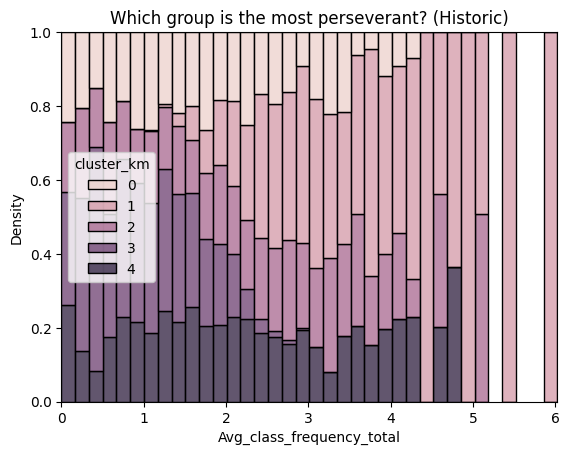

In [42]:
# Trazamos las distribuciones para frecuencia (historico)
sns.histplot(data=gym, 
             x='Avg_class_frequency_total', 
             hue='cluster_km', 
             stat='density', 
             common_norm=False, 
             multiple='fill')

plt.title('Which group is the most perseverant? (Historic)')
plt.show()

Observamos claramente que las personas del cluster 1 van al gimasio mas seguido que las de otros clusters y van por lo menos una vez a la semana. En contraste, las personas del cluster 3 son las que menos seguido van y vna un maximo de 3 veces por semana.

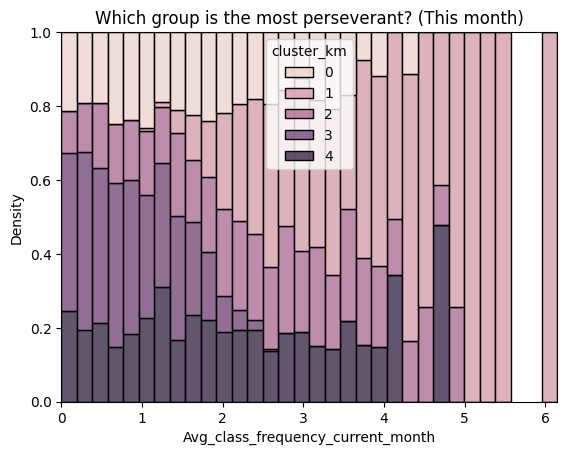

In [43]:
# Trazamos las distribuciones para frecuencia (este mes)
sns.histplot(data=gym, 
             x='Avg_class_frequency_current_month', 
             hue='cluster_km', 
             stat='density', 
             common_norm=False, 
             multiple='fill')

plt.title('Which group is the most perseverant? (This month)')
plt.show()

Vemos un grafico muy parecido al anterior con las mismas tendencias.

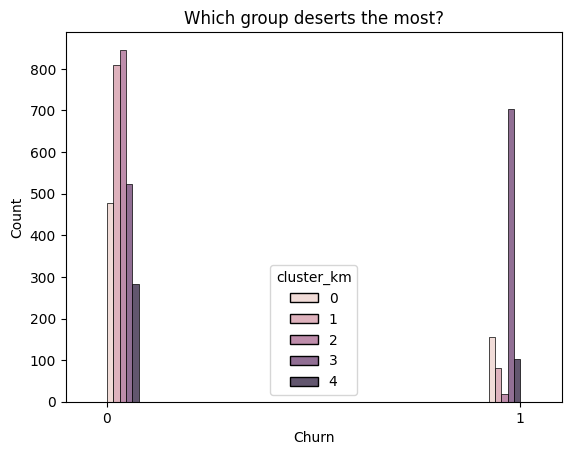

In [44]:
# Trazamos las distribuciones para Churn
sns.histplot(data=gym, 
             x='Churn', 
             hue='cluster_km', 
             multiple='dodge')

plt.xlim([-0.1, 1.1])
plt.xticks(label=[0, 1], ticks=[0, 1])
plt.title('Which group deserts the most?')
plt.show()

De todas las personas que cancelan su servicio, la gran mayoria pertenece al cluster 3. Asimismo, la mitad de las perssonas que se quedan pertenecen a los clusters 1 o 2.

### Tazas de cancelacion

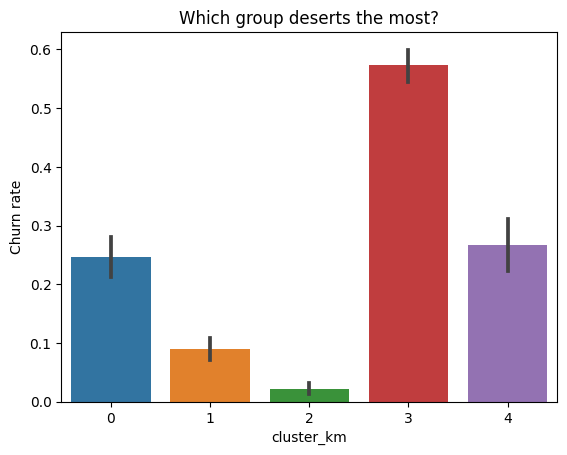

In [45]:
# Mostramos el grafico de barras para tasas de cancelacion por cluster
sns.barplot(data=gym, x='cluster_km', y='Churn')

plt.ylabel('Churn rate')
plt.title('Which group deserts the most?')
plt.show()

En concordancia con el grafico anterior, el grupo mas propenso a irse es el numero 3: tiene la mayor tasa de cancelacion y la mayoria de personas que cancelan pertenecen a este grupo.

A su vez, los grupos con mayor lealtad son el 1 y el 2: tienen la menos tasa de cancelacion y forman mas del 50% de todas las personas que se quedan.

### Conclusiones

- Cluster 0: viven cerca, trabajan con nuestros socios, vinieron con amigos, toman contratos de 1 o 6 meses, llevan 4 meses con nosotros, vienen 1 a 2 veces por semana
    - Cliente traido por un amigo y que viene poco (riesgo moderado)
    - Mejorar su frecuencia de asistencia
    - Mejorar su actividad grupal
- Cluster 1: viven cerca, no trabajan con nuestros socios, vinieron solos, toman contratos de 1 o 6 meses, llevan 3 meses con nosotros, vienen 3 veces por semana
    - Cliente que vino por su cuenta y entrena de forma frecuente (poco riesgo)
    - Mejorar su actividad grupal
- Cluster 2: viven cerca, trabajan con nuestros socios, toman contratos de 12 meses, disfrutan las actividades grupales, toman contratos de 12 meses, llevan 5 meses con nosotros y vienen 2 veces por semana
    - Cliente comprometido, que disfruta de actividades grupales y viene de manera regular (sin riesgo)
    - Dar premios por su preferencia
- Cluster 3: no viven tan cerca, no trabajan con nuestros socios, vinieron solos, toman contratos de 1 mes, no participan en actividades grupales, llevan 2 meses con nosotros, vienen 1 vez por semana
    - Cliente de otro distrito que no se compromete ni participa en actividades grupales y viene muy poco (riesgo muy alto)
    - Promover actividades en grupo
    - Promover invitaciones
    - Promover frecuencia de asistencia
    - Incentivar contratos de 6 meses
- Cluster 4: viven cerca, no dan su celular, toman contratos de 1 mes o 6/12 meses, llevan 4 meses con nostros, vienen 2 veces por semana
    - Cliente promedio, viene de forma regular (riesgo moderado)
    - Mejorar su actividad grupal/frecuencia de asistencia
    - Promover contratos de 6 meses

- Existen caracteristicas que se diferencian marcadamente entre los grupos (invitaciones de amigos, actividades grupales, frecuencia de asistencia)
- El grupo 3 es el mas propenso a irse
- Los grupos 2 y 1 son los mas leales

<div class="alert alert-block alert-info">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gracias por el comentario. Ya fue implementado
</div>

## Conclusiones y Recomendaciones

Los pronosticos y segmentaciones confirman lo observado en el analisis exploratorio inicial: las dinamicas sociales tienen una influencia importante en la continuacion del servicio.

Aquellos clientes con fuertes lazos sociales tienden a quedarse, los clientes que carecen de ellos tienden a irse. Esta conclusion no solo parte de los analisis realizados, sino tambien de la naturaleza humana. El ser humano es un ser social y esta dimension puede aferrarlo a lugares o alejarlo de ellos. Es mas sencillo ir al gimnasio si tienes un amigo con quien ir (cultura "gym bro/sis").

Se recomienda fomentar estas dinamicas sociales entre todos los clientes, principalmente aquellos que lo necesitan mas (grupo 3). Algunas alternativas son:
 - Campanha "trae a un amigo": ofrecer descuentos a las personas que traigan a un amigo al gimnasio, esto ademas aumenta la base de clientes potenciales; el amigo tambien puede recibir descuentos
 - Campanha "entrenemos juntos": descuentos en actividades grupales para aquellos que nunca han asistido, posibles a la persona que los animo a ir a la actividad grupal; esto ademas fomenta la creacion de lazos potenciales entre invitador e invitado
 - Campanha "nos vemos la proxima": descuentos/regalos a las personas que van mas seguido (equivalente a N veces por semana en el mes de la promocion, por categorias), posibilidad de que puedan llevar invitados gratis; el invitado puede recibir descuentos
 - Campanha "renovacion": promover la renovacion de contratos de 1 mes a contratos de 3 meses con descuento

<div class="alert alert-block alert-danger">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo, Ayrton. Nos quedan algunos elementos por corregir antes de poder aprobar tu proyecto. He dejado comentarios a lo largo del documento para ello.
</div>

<div class="alert alert-block alert-info">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muchas gracias por todas sus observaciones. Todas han sido corregidas e implementadas. Quedo al pendiente de la aprobacion del proyecto. Muchas gracias.
</div>

<div class="alert alert-block alert-success">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Todo corregido. Has aprobado un nuevo proyecto. ¡Felicitaciones!
</div>